In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 2011-2018 SEASONS 

In [2]:
df = pd.read_csv('MLB_STATS_2011-2018.csv')

In [3]:
df.head()

,#Bat,#P,25-Man,2B,3B,AB,Avg_Salary,BA,BB9,BB_x,...,Suspended,TB,Tm,Total Payroll,W,WHIP,WP,Year,cSho,tSho
0,51,25,57930520.0,293,37,5421,1.731183e+06,0.250,2.8,531,...,NaN,2240,ARI,65784971.0,94,1.286,39,2011,1,12
1,45,21,98521630.0,244,16,5528,2.321633e+06,0.243,3.2,504,...,NaN,2140,ATL,99830230.0,89,1.252,61,2011,2,16
2,50,27,94391741.0,273,13,5585,1.926362e+06,0.257,3.3,452,...,NaN,2306,BAL,94391741.0,69,1.454,32,2011,1,7
3,49,27,164517590.0,352,35,5710,3.671346e+06,0.280,3.3,578,...,NaN,2631,BOS,172553261.0,90,1.308,58,2011,1,13
4,42,22,124652698.0,285,36,5549,3.486942e+06,0.256,3.6,425,...,NaN,2224,CHC,139477698.0,71,1.408,51,2011,1,5


In [4]:
df.shape

(239, 72)

In [5]:
df.tail()

,#Bat,#P,25-Man,2B,3B,AB,Avg_Salary,BA,BB9,BB_x,...,Suspended,TB,Tm,Total Payroll,W,WHIP,WP,Year,cSho,tSho
234,49,30,113991329.0,248,9,5498,4.549564e+06,0.249,3.7,525,...,0.0,2250,STL,163784311.0,88,1.338,63,2018,1,8
235,54,31,25668988.0,274,43,5475,1.966005e+06,0.258,3.1,540,...,0.0,2225,TBR,68810167.0,90,1.199,55,2018,0,14
236,50,32,96239016.0,266,24,5453,4.017858e+06,0.240,3.1,555,...,0.0,2204,TEX,140625018.0,67,1.403,57,2018,0,5
237,63,36,81293347.0,320,16,5477,4.079626e+06,0.244,3.5,499,...,0.0,2339,TOR,150946147.0,73,1.414,71,2018,0,3
238,53,31,130197979.0,284,25,5517,5.182360e+06,0.254,3.0,631,...,0.0,2309,WSN,181382609.0,82,1.250,42,2018,1,7


In [6]:
df.dtypes

#Bat               int64
#P                 int64
25-Man           float64
2B                 int64
3B                 int64
AB                 int64
Avg_Salary       float64
BA               float64
BB9              float64
BB_x               int64
BB_y               int64
BF                 int64
BK                 int64
BatAge           float64
Buried           float64
CG                 int64
CS                 int64
Disabled List    float64
ER                 int64
ERA              float64
ERA+               int64
FIP              float64
GDP                int64
GF                 int64
GS                 int64
G_x                int64
G_y                int64
H9               float64
HBP_x              int64
HBP_y              int64
                  ...   
OPS+               int64
PA                 int64
PAge             float64
R/G              float64
RA/G             float64
RBI                int64
R_x                int64
R_y                int64
Rank             float64


In [7]:
df.columns

Index(['#Bat', '#P', '25-Man', '2B', '3B', 'AB', 'Avg_Salary', 'BA', 'BB9',
       'BB_x', 'BB_y', 'BF', 'BK', 'BatAge', 'Buried', 'CG', 'CS',
       'Disabled List', 'ER', 'ERA', 'ERA+', 'FIP', 'GDP', 'GF', 'GS', 'G_x',
       'G_y', 'H9', 'HBP_x', 'HBP_y', 'HR9', 'HR_x', 'HR_y', 'H_x', 'H_y',
       'IBB_x', 'IBB_y', 'IP', 'LOB_x', 'LOB_y', 'OBP', 'OPS', 'OPS+', 'PA',
       'PAge', 'R/G', 'RA/G', 'RBI', 'R_x', 'R_y', 'Rank', 'Retained',
       'Roster', 'SB', 'SF', 'SH', 'SLG', 'SO/W', 'SO9', 'SO_x', 'SO_y', 'SV',
       'Suspended', 'TB', 'Tm', 'Total Payroll', 'W', 'WHIP', 'WP', 'Year',
       'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

2018    30
2017    30
2016    30
2015    30
2014    30
2013    30
2012    30
2011    29
Name: Year, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat            -0.288480
#P              -0.247136
25-Man           0.513069
2B               0.317035
3B              -0.089006
AB               0.134088
Avg_Salary       0.306017
BA               0.378658
BB9             -0.481999
BB_x             0.458665
BB_y            -0.453219
BF              -0.588028
BK              -0.206974
BatAge           0.262656
Buried           0.070167
CG               0.228315
CS              -0.175995
Disabled List   -0.106827
ER              -0.721523
ERA             -0.727691
ERA+             0.802283
FIP             -0.612804
GDP              0.080360
GF              -0.213823
GS               0.130083
G_x              0.130083
G_y              0.130083
H9              -0.704778
HBP_x            0.222003
HBP_y           -0.111587
                   ...   
OPS              0.542539
OPS+             0.603916
PA               0.450390
PAge             0.319259
R/G              0.569436
RA/G            -0.740626
RBI              0.568976
R_x         

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

#Bat              0
#P                0
25-Man            0
2B                0
3B                0
AB                0
Avg_Salary        0
BA                0
BB9               0
BB_x              0
BB_y              0
BF                0
BK                0
BatAge            0
Buried           89
CG                0
CS                0
Disabled List    89
ER                0
ERA               0
ERA+              0
FIP               0
GDP               0
GF                0
GS                0
G_x               0
G_y               0
H9                0
HBP_x             0
HBP_y             0
                 ..
OPS+              0
PA                0
PAge              0
R/G               0
RA/G              0
RBI               0
R_x               0
R_y               0
Rank             89
Retained         89
Roster            0
SB                0
SF                0
SH                0
SLG               0
SO/W              0
SO9               0
SO_x              0
SO_y              0


In [12]:
df.columns

Index(['#Bat', '#P', '25-Man', '2B', '3B', 'AB', 'Avg_Salary', 'BA', 'BB9',
       'BB_x', 'BB_y', 'BF', 'BK', 'BatAge', 'Buried', 'CG', 'CS',
       'Disabled List', 'ER', 'ERA', 'ERA+', 'FIP', 'GDP', 'GF', 'GS', 'G_x',
       'G_y', 'H9', 'HBP_x', 'HBP_y', 'HR9', 'HR_x', 'HR_y', 'H_x', 'H_y',
       'IBB_x', 'IBB_y', 'IP', 'LOB_x', 'LOB_y', 'OBP', 'OPS', 'OPS+', 'PA',
       'PAge', 'R/G', 'RA/G', 'RBI', 'R_x', 'R_y', 'Rank', 'Retained',
       'Roster', 'SB', 'SF', 'SH', 'SLG', 'SO/W', 'SO9', 'SO_x', 'SO_y', 'SV',
       'Suspended', 'TB', 'Tm', 'Total Payroll', 'W', 'WHIP', 'WP', 'Year',
       'cSho', 'tSho'],
      dtype='object')

# Split the data into training & test sets.

In [13]:
y = df.W
#y

## Linear Regression with scikit learn model

In [14]:
# create training and testing vars
predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(191, 6) (191,)
(48, 6) (48,)


In [15]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [16]:
print("The Trainng Score For Model 1:")
print(lm.score(X_train,y_train))
print()
print("The Test Score For Model 1:")
print(lm.score(X_test,y_test))
print()
print(model.coef_)

The Trainng Score For Model 1:
0.893179087426

The Test Score For Model 1:
0.88767317079

[ -1.36088360e+01   2.07094854e-08   3.54368137e-01   1.91589685e+02
   1.54554125e+02  -4.40510444e+01]


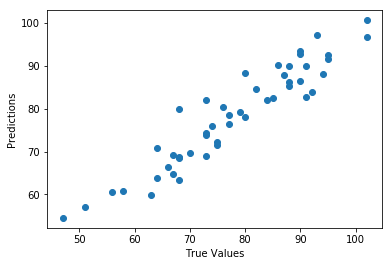

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [18]:
pred_tr = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 1:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 1:
Root Mean Squared Error Train: 3.5858843055916756

Root Mean Squared Error Test: 4.303196145972421



## LINEAR REGRESSION WITH STATSMODEL

In [19]:
predictors = ['ERA','25-Man','SV','SLG','OBP','BA']

In [20]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print('statsmodel 1')
print(results.summary())

statsmodel 1
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.629e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):          5.05e-249
Time:                        13:01:29   Log-Likelihood:                -514.99
No. Observations:                 191   AIC:                             1042.
Df Residuals:                     185   BIC:                             1061.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -13.4821      0.657    -20

In [21]:
resid = results.resid

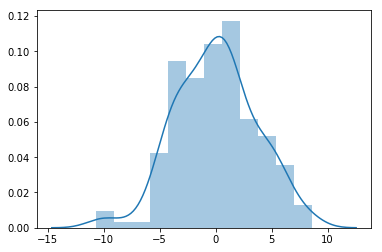

In [22]:
sns.distplot(resid)

## MODEL 2 WITH FEWER PREDICTORS: 'ERA','25-Man','SV','OBP'

In [23]:
predictors = ['ERA','25-Man','SV','OBP']
X = df[predictors]
y = df.W
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(191, 4) (191,)
(48, 4) (48,)


In [24]:
#X_train

In [25]:
#X_test

## scikit learn model

In [26]:
# fit a model
lm2 = LinearRegression()
model2 = lm2.fit(X_train, y_train)
pred2_ts = lm2.predict(X_test)

In [27]:
print("The Training Score For Model 2:")
print(lm2.score(X_train,y_train))
print()
print("The Test Score For Model 2:")
print(lm2.score(X_test,y_test))
print()
print(model2.coef_)

The Training Score For Model 2:
0.820973368621

The Test Score For Model 2:
0.861491080668

[ -1.04254804e+01   3.15223300e-08   4.61854405e-01   4.27196630e+02]


In [28]:
pred_tr2 = lm2.predict(X_train)
predictions2 = lm2.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr2))
print("Root Mean Squared Error for model 2 Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions2))
print("Root Mean Squared Error for model 2 Test: {}".format(rmse_test))
print()

Root Mean Squared Error for model 2 Train: 4.642233181556876

Root Mean Squared Error for model 2 Test: 4.7784633885448695



## LINEAR REGRESSION WITH STATSMODEL

In [29]:
sm_model2 = sm.OLS(y_train, X_train)
results2 = sm_model2.fit()
print('statsmodel Model 2')
print(results2.summary())

statsmodel Model 2
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.397e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):          2.43e-230
Time:                        13:01:30   Log-Likelihood:                -569.26
No. Observations:                 191   AIC:                             1147.
Df Residuals:                     187   BIC:                             1160.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -11.5502      0.808 

In [30]:
#########################################################################################

## Model 3 with 4 Predictors: 'ERA','25-Man','SV','SLG'

In [31]:
predictors = ['ERA','25-Man','SV','SLG']
X = df[predictors]
y = df.W
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(191, 4) (191,)
(48, 4) (48,)


In [32]:
# fit a model
lm3= LinearRegression()
model3= lm3.fit(X_train, y_train)
#odel3= lm3fit(X_train, y_train)
pred3_test = lm3.predict(X_test)
#red3ts = lm3predict(X_test)

# evaluate & print scores for training & test data set
# fit a model
print("The Training Score For Model 3:")
print(lm3.score(X_train, y_train))
print()
print("The Test Score For Model 3:")
print(lm3.score(X_test, y_test))
print()
print(model3.coef_)


The Training Score For Model 3:
0.886118609064

The Test Score For Model 3:
0.870849998009

[ -1.44875111e+01   2.46748488e-08   3.24473737e-01   2.32949997e+02]


In [33]:
pred_tr3 = lm3.predict(X_train)
predictions3 = lm3.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr3))
print("Root Mean train Squared Error for model 3 Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions3))
print("Root Mean test Squared Error for model 3 Test: {}".format(rmse_test))
print()

Root Mean train Squared Error for model 3 Train: 3.702495275250317

Root Mean test Squared Error for model 3 Test: 4.614201978517011



## Statsmodel Linear Regression

In [34]:
sm_model3 = sm.OLS(y_train, X_train)
results3 = sm_model3.fit()
print('statsmodel Model 3')
print(results3.summary())

statsmodel Model 3
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.006e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):          5.40e-245
Time:                        13:01:30   Log-Likelihood:                -534.79
No. Observations:                 191   AIC:                             1078.
Df Residuals:                     187   BIC:                             1091.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -12.5932      0.678 

In [35]:
######################################################################################

In [36]:
#standardScalerX = StandardScaler()
#x = standardScalerX.fit_transform(X)

In [37]:
df.head(3)

,#Bat,#P,25-Man,2B,3B,AB,Avg_Salary,BA,BB9,BB_x,...,Suspended,TB,Tm,Total Payroll,W,WHIP,WP,Year,cSho,tSho
0,51,25,57930520.0,293,37,5421,1.731183e+06,0.250,2.8,531,...,NaN,2240,ARI,65784971.0,94,1.286,39,2011,1,12
1,45,21,98521630.0,244,16,5528,2.321633e+06,0.243,3.2,504,...,NaN,2140,ATL,99830230.0,89,1.252,61,2011,2,16
2,50,27,94391741.0,273,13,5585,1.926362e+06,0.257,3.3,452,...,NaN,2306,BAL,94391741.0,69,1.454,32,2011,1,7


## Random Forest Regression

In [38]:
y = df.W
#X = df.drop(["W","Tm","Suspended"], axis=1)
predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
X = df[predictors]

In [39]:
X.head(3)

,ERA,25-Man,SV,SLG,OBP,BA
0,3.80,57930520.0,58,0.413,0.322,0.250
1,3.48,98521630.0,52,0.387,0.308,0.243
2,4.89,94391741.0,32,0.413,0.316,0.257


In [40]:
#X.columns

In [41]:
#y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(191, 6) (191,)
(48, 6) (48,)


In [43]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [44]:
# n_estimators refers to the number of trees in the random forest
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [45]:
y_pred

array([ 101.35,   79.5 ,   69.4 ,   76.25,   85.35,   87.2 ,   75.3 ,
         95.45,   88.  ,   81.35,   69.55,   85.3 ,   85.7 ,   87.25,
         89.45,   76.8 ,   69.4 ,   64.95,   66.9 ,   68.4 ,   68.95,
         96.45,   86.95,   91.5 ,   80.25,   65.85,   64.75,   95.3 ,
         75.15,   92.45,   81.45,   94.3 ,   84.45,   74.75,   75.75,
         61.45,   64.4 ,   91.15,   67.7 ,   66.  ,   73.55,   87.1 ,
         69.9 ,   79.2 ,   67.3 ,   89.25,   81.4 ,   90.  ])

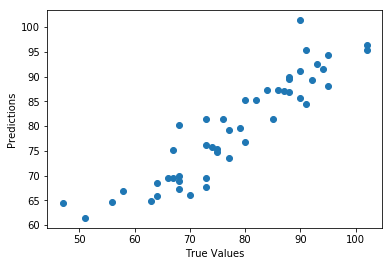

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [47]:
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, regressor.predict(X_train))
rmse_train = np.sqrt(mse_train)
print('Random Forest Regressor Model 1')
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test,regressor.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

Random Forest Regressor Model 1
 root mean squared train error RMSE: 1.9062
 root mean squared test error RMSE: 5.5022


In [48]:
print("The Training Score For Random Forest Regressor Model 1:")
print(regressor.score(X_train, y_train))
print()
print("The Test Score For Random Forest Regressor Model 1:")
print(regressor.score(X_test, y_test))
print()

The Training Score For Random Forest Regressor Model 1:
0.969812918431

The Test Score For Random Forest Regressor Model 1:
0.816354565153



In [49]:
# regressor with fewer predictors
y = df.W
#predictors = ['ERA','25-Man','SV','OBP']
predictors = ['ERA','25-Man','SV','SLG']
X = df[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

(191, 4) (191,)
(48, 4) (48,)


In [50]:
regressor2 = RandomForestRegressor(n_estimators=10, random_state=0)  
regressor2.fit(X_train, y_train)  
y_pred2 = regressor2.predict(X_test)

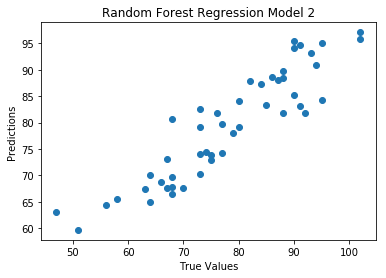

In [51]:
plt.scatter(y_test, y_pred2)
plt.title('Random Forest Regression Model 2')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [52]:
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, regressor2.predict(X_train))
rmse_train = np.sqrt(mse_train)
print('Random Forest Regressor Model 2')
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test,regressor2.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

Random Forest Regressor Model 2
 root mean squared train error RMSE: 2.2539
 root mean squared test error RMSE: 5.5519


In [53]:
print("The Training Score For Random Forest Regressor Model 2:")
print(regressor2.score(X_train, y_train))
print()
print("The Test Score For Random Forest Regressor Model 2:")
print(regressor2.score(X_test, y_test))
print()

The Training Score For Random Forest Regressor Model 2:
0.957798977547

The Test Score For Random Forest Regressor Model 2:
0.813023645224



## Gradient Boosting Regression

In [54]:
# define the target variable and the predictors of target
y = df.W
predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
X = df[predictors]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)

# scale the data
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [55]:
# fit the training data with gradient boosting regressor
#params['n_estimators'] = 

#gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 200)
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 500)
gradient_boosting_regressor.fit(X_train, y_train)
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, gradient_boosting_regressor.predict(X_train))
rmse_train = np.sqrt(mse_train)
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test, gradient_boosting_regressor.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

 root mean squared train error RMSE: 0.1988
 root mean squared test error RMSE: 5.2876


In [56]:
print("The Training Score For the Gradient Boosting Regressor Model 1:")
print(gradient_boosting_regressor.score(X_train, y_train))
print()
print("The Test Score For the Gradient Boosting Regressor Model 1:")
print(gradient_boosting_regressor.score(X_test, y_test))
print()

The Training Score For the Gradient Boosting Regressor Model 1:
0.999671786569

The Test Score For the Gradient Boosting Regressor Model 1:
0.830402951249



## CHECK FOR COLLINEARITY OF PREDICTORS

### A simple way to detect collinearity is to look at the correlation matrix of the predictors. 
### An element of this matrix that is large in absolute value 
### indicates a pair of highly correlated variables, and therefore a collinearity problem

In [57]:
#df2 = df[[ 'OPS+','RBI','ERA+','25-Man','SV']]
#predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
#df2 = df[[ 'OPS+','RBI','ERA','25-Man','SV','SLG']]
df2 = df[['ERA','25-Man','SV','SLG','OBP','BA']]
df2.head()

,ERA,25-Man,SV,SLG,OBP,BA
0,3.80,57930520.0,58,0.413,0.322,0.250
1,3.48,98521630.0,52,0.387,0.308,0.243
2,4.89,94391741.0,32,0.413,0.316,0.257
3,4.20,164517590.0,36,0.461,0.349,0.280
4,4.33,124652698.0,40,0.401,0.314,0.256


In [58]:
df2.corr()

,ERA,25-Man,SV,SLG,OBP,BA
ERA,1.000000,-0.284428,-0.567735,0.122555,-0.137369,0.041072
25-Man,-0.284428,1.000000,0.248230,0.336750,0.419624,0.358246
SV,-0.567735,0.248230,1.000000,0.074105,0.119942,0.038671
SLG,0.122555,0.336750,0.074105,1.000000,0.732401,0.649018
OBP,-0.137369,0.419624,0.119942,0.732401,1.000000,0.792759
BA,0.041072,0.358246,0.038671,0.649018,0.792759,1.000000


In [59]:
# Based on the above correlation matrix, SV is moderately negatively correlated with ERA
# SLG, OBP & BA are all highly correlated with each other